In [4]:
# データの準備
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, # サンプルデータの総数
                 n_features=2, # 特徴量の総数(xとy座標に値を入力している)
                 centers=3, # 作成する正規分布の数
                 random_state=0) #乱数生成器の状態を指定
print(X)

[[ 0.06344785  5.42080362]
 [ 1.32967014 -0.4857003 ]
 [ 1.7373078   4.42546234]
 [-1.61283478  3.1121752 ]
 [-1.74644504  1.83384564]
 [-1.51827611  3.44488647]
 [ 0.02458305  2.96215652]
 [-0.24916544  5.1481503 ]
 [-2.48740839  2.1247649 ]
 [ 0.21196866  3.91227665]
 [ 0.11898772  1.08644226]
 [ 2.6225578   0.67498856]
 [ 3.70340245  1.06189142]
 [ 1.42013331  4.63746165]
 [ 1.78753398 -0.23034767]
 [-1.74385358  3.36327551]
 [ 1.37861172  3.61897724]
 [ 1.35269561  3.20438654]
 [-1.18799989  4.93892582]
 [ 0.86640826  0.39084731]
 [-1.96609354  3.09922069]
 [ 1.28933778  3.44969159]
 [ 0.89791226  0.58537141]
 [ 0.08080352  4.69068983]
 [-3.20812223  2.0289109 ]
 [-2.45706052  2.73929317]
 [-0.07228289  2.88376939]
 [-2.5568393   2.5679389 ]
 [ 2.63378902  1.24731812]
 [ 2.74508569  2.19950989]
 [-0.93702419  2.55402345]
 [-0.09448254  5.35823905]
 [ 1.60150153  2.70172967]
 [ 2.21177406  1.1298447 ]
 [ 2.8285205  -0.28621698]
 [-3.47870811  2.25799053]
 [ 2.5490093   0.78155972]
 

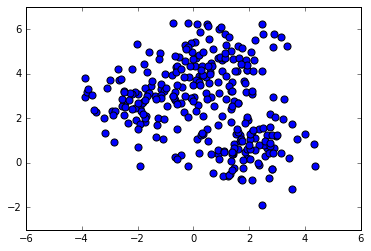

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:,0],
           X[:,1],
           c='blue',
           marker='o',
           s=50)
plt.show()

In [7]:
# k-means法をデータに適用
# 今回3つの正規分布から生成したデータだが仮にクラスタ数を5つに設定してみる
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(X)
km_predict = km.predict(X)
print(km_predict)

[3 2 0 4 4 4 1 3 4 3 1 2 2 0 2 4 0 0 3 2 4 0 2 3 4 4 1 4 2 2 1 3 1 2 2 4 2
 1 3 1 4 2 3 2 2 4 2 4 3 2 4 0 4 1 2 3 3 3 4 0 2 2 3 4 2 4 1 2 3 2 1 3 4 1
 2 0 2 4 3 0 4 0 2 3 3 0 2 4 3 3 1 2 4 0 2 2 3 1 4 1 2 3 3 2 0 0 4 0 1 2 3
 4 0 0 4 4 3 0 1 2 1 4 1 2 2 4 2 2 2 4 4 4 1 4 4 2 4 3 3 4 2 3 2 1 1 4 3 3
 1 2 1 4 3 2 4 4 2 2 3 2 3 0 2 3 3 0 0 0 1 4 2 0 3 2 1 2 3 2 3 0 2 1 0 0 3
 1 2 1 3 1 0 0 2 2 4 0 2 4 0 4 2 4 0 4 2 3 3 4 3 2 0 3 4 2 1 1 1 3 1 2 1 1
 2 2 0 4 4 3 0 1 3 2 2 3 2 4 4 1 1 3 2 4 4 3 4 2 3 4 0 2 2 0 1 1 4 3 1 1 0
 0 4 0 1 4 3 4 3 2 2 2 2 0 0 3 0 0 4 4 2 0 0 2 2 2 4 2 4 4 2 2 4 1 3 2 0 3
 3 2 3 1]


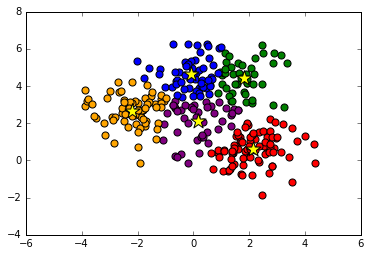

In [18]:
plt.scatter(X[km_predict == 0,0], # グラフのxの値
           X[km_predict == 0,1], # グラフのyの値
           s=50, # プロットのサイズ
           c='green',
           label='cluster1')

plt.scatter(X[km_predict == 1,0],
           X[km_predict == 1,1],
           s=50,
           c='purple',
           label='cluster2')

plt.scatter(X[km_predict == 2,0],
           X[km_predict == 2,1],
           s=50,
           c='red',
           label='cluster3')

plt.scatter(X[km_predict == 3,0],
           X[km_predict == 3,1],
           s=50,
           c='blue',
           label='cluster4')

plt.scatter(X[km_predict == 4,0],
           X[km_predict == 4,1],
           s=50,
           c='orange',
           label='cluster5')

# クラスターの重心は星マークを表示
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s=250,
           marker='*',
           c='yellow',
           label='centroid')
plt.show()

In [19]:
# エルボー法による最適なクラスタ数の模索
print('sum of distance: ', km.inertia_)

sum of distance:  372.08921716


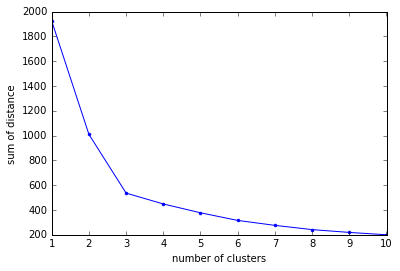

In [21]:
# エルボー法を用いてクラスター数を探すためのクラスや関数はないため自作の必要がある
distances = []
for i in range(1,11): # for文を10回繰り返す
    km = KMeans(n_clusters=i)
    km.fit(X)
    distances.append(km.inertia_)
    
# ここからグラフの描画
plt.plot(range(1,11), distances, marker='.')
plt.xlabel('number of clusters')
plt.ylabel('sum of distance')

# 横軸がクラスター数、縦軸がsseとなっている
plt.show()

In [22]:
# 妥当なクラスター数を3に変更して学習させてみる
km = KMeans(n_clusters=3)
km.fit(X)
km_predict = km.predict(X)
print(km_predict)

[1 0 1 2 2 2 1 1 2 1 0 0 0 1 0 2 1 1 1 0 2 1 0 1 2 2 2 2 0 0 2 1 1 0 0 2 0
 0 1 0 2 0 1 0 0 2 0 2 2 0 2 1 2 2 0 1 1 2 2 1 0 0 1 2 0 2 1 0 1 0 2 1 2 2
 0 1 0 2 1 1 2 1 0 1 1 1 0 2 1 1 2 0 2 1 0 0 1 0 2 1 0 1 1 0 1 1 2 1 0 0 1
 2 1 1 2 2 1 1 0 0 0 2 0 0 0 2 0 0 0 2 2 2 0 2 2 0 2 1 2 2 0 1 0 1 2 2 1 2
 2 0 1 2 1 0 2 2 0 0 1 0 1 1 0 1 2 0 1 1 2 2 0 1 1 0 0 0 1 0 1 1 0 2 1 1 1
 2 0 2 1 2 1 1 0 0 2 1 0 2 1 2 0 2 1 2 0 2 1 2 1 0 1 1 2 0 0 1 0 1 0 0 1 2
 0 0 1 2 2 1 0 1 1 0 0 1 0 2 2 0 2 1 0 2 2 2 2 0 1 2 1 0 0 1 0 0 2 1 0 2 1
 1 2 1 2 2 2 2 1 0 0 0 0 1 1 1 1 1 2 2 0 1 1 0 0 0 2 0 2 2 0 0 2 2 1 0 1 1
 1 0 1 1]


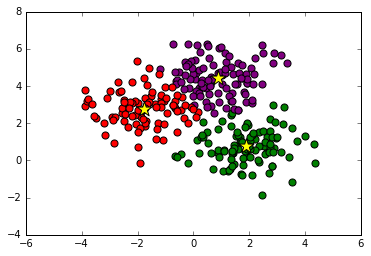

In [23]:
plt.scatter(X[km_predict == 0,0], # グラフのxの値
           X[km_predict == 0,1], # グラフのyの値
           s=50, # プロットのサイズ
           c='green',
           label='cluster1')

plt.scatter(X[km_predict == 1,0],
           X[km_predict == 1,1],
           s=50,
           c='purple',
           label='cluster2')

plt.scatter(X[km_predict == 2,0],
           X[km_predict == 2,1],
           s=50,
           c='red',
           label='cluster3')

# クラスターの重心は星マークを表示
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s=250,
           marker='*',
           c='yellow',
           label='centroid')
plt.show()